In [17]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("DATASET_BERES1.csv",parse_dates=True)
df = pd.DataFrame(df)
#df["start"] = df["start"].astype("datetime64")

vect = df[['Mean_intercontact', 'SpatialLoc']].to_numpy()
df['vect'] = vect.tolist()
df = df[['start','vect']]


#print(df_stand)

print(df)
df.to_csv('DATASET_Vect.csv', index=False,      encoding='utf-8')
#print(df2)
#print(df2[15])

#print(df.info())

                      start                       vect
0       2004-07-19 12:00:00                 [0.0, 2.0]
1       2004-07-19 12:00:00  [0.0005555555555555, 2.0]
2       2004-07-20 06:00:00   [1.662222222222222, 2.0]
3       2004-07-20 06:00:00  [11.430138888888887, 2.0]
4       2004-07-20 06:00:00  [0.2304545454545454, 2.0]
...                     ...                        ...
137980  2005-06-20 06:00:00   [206.6880555555556, 2.0]
137981  2005-06-20 12:00:00  [15.592222222222222, 2.0]
137982  2005-06-20 18:00:00  [0.4495833333333333, 2.0]
137983  2005-06-21 12:00:00    [6.63462962962963, 2.0]
137984  2005-06-22 12:00:00              [54.885, 2.0]

[137985 rows x 2 columns]


                     intercontact
start                            
2004-07-19 12:00:00      0.000000
2004-07-19 12:00:00      0.000556
2004-07-20 06:00:00      1.662222
2004-07-20 06:00:00      1.895278
2004-07-20 06:00:00      0.230455
...                           ...
2005-06-20 06:00:00      0.000000
2005-06-20 12:00:00      0.000000
2005-06-20 18:00:00      0.000000
2005-06-21 12:00:00      0.975278
2005-06-22 12:00:00      0.000000

[137985 rows x 1 columns]


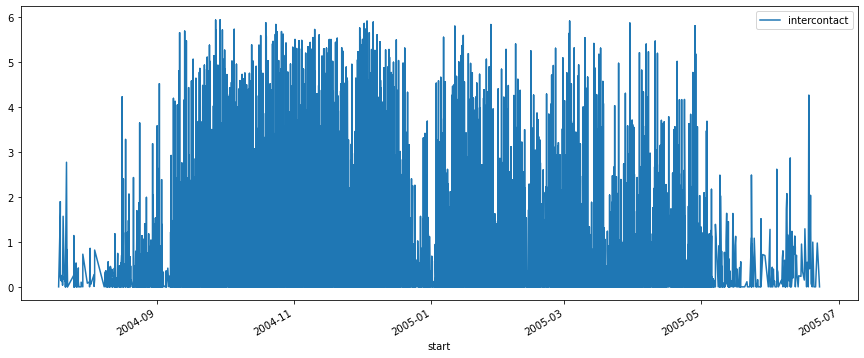

In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv("MeanIntercontact_Window.csv", index_col='start', parse_dates=True)
drop_col = ['id_colums']
df.drop(drop_col, axis=1, inplace=True)
print(df)
df.plot(figsize=(15, 6))
plt.show()


        intercontact
0           0.000000
1           0.000094
2           0.279757
3           0.318981
4           0.038786
...              ...
137980      0.000000
137981      0.000000
137982      0.000000
137983      0.164142
137984      0.000000

[137985 rows x 1 columns]


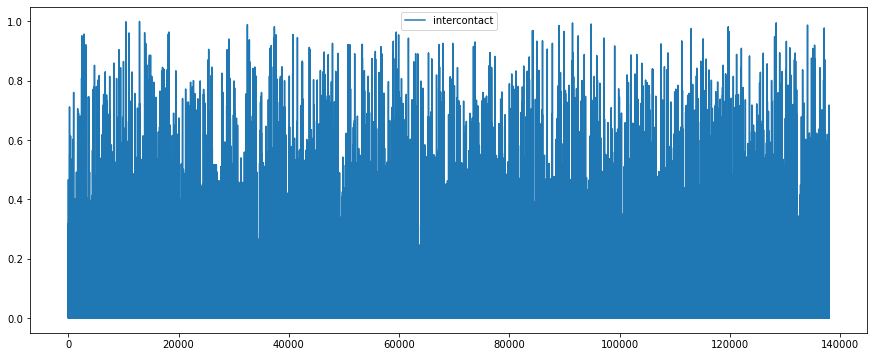

In [3]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("MeanIntercontact_Window.csv", usecols=['intercontact'], parse_dates=True)
df = pd.DataFrame(df)

df_stand = (df-df.min())/df.max()-df.min()

print(df_stand)
df_stand.plot(figsize=(15, 6))
plt.show()
#df_stand.to_csv('MeanInt_Normalize.csv', index=False,      encoding='utf-8')

In [ ]:
#x = df['intercontact']
# create a scaler object
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
df_norm = pd.DataFrame(scaled, columns=df.columns)
print(df_norm.head(20))
df_norm.plot(figsize=(15, 6))
plt.show()